# Taxonomic analysis 

Preambule to Multiple Sequence alignment and Phylogenetic tree building.

### Import necessary modules 

In [1]:
from Bio import (
    SeqIO as seqio, 
    SearchIO as searchio, 
    Entrez as entrez
)

from Bio.Seq import Seq as seq

import toml
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial, reduce

from annotathon.utils.customobjs import (
    Path as path,
    objdict as odict
)

from typing import (
    List, Dict, NoReturn, 
    Any, Callable, Tuple,
    Optional, Union
)
    
from annotathon.parsing.blast import parse_alignment_descriptions as parse_ncbi
from annotathon.annotation.helper_functions import *

### Configuration to access NCBI's servers :

In [2]:
# Load configuration to access NCBI :
with open("../creds/entrezpy.toml", "r") as f:
    ncbi = toml.load(f, _dict=odict)

In [3]:
# set credentials : 
entrez.api_key = ncbi.credentials.apikey
entrez.email = ncbi.credentials.email
entrez.tool = ncbi.credentials.tool

In [4]:
ncbi.credentials.email

'gmaganna.biomed@gmail.com'

In [5]:
# set plotting params :
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 8)

In [6]:
with open("../config/locations.toml", "r") as f:
    _config = toml.load(f, _dict=odict)
_config

{'locations': {'default': '../data/homologues-par-blast/default-nr',
  'cinqk': '../data/homologues-par-blast/5k-nr',
  'landmark': '../data/homologues-par-blast/landmark-noexclude',
  'sp': '../data/homologues-par-blast/swissprot',
  'anthony': '../data/anthony/'}}

In [7]:
locations = odict({ 
    key: path(value) for key, value in _config.locations.items()
})
locations

{'default': PosixPath('../data/homologues-par-blast/default-nr'),
 'cinqk': PosixPath('../data/homologues-par-blast/5k-nr'),
 'landmark': PosixPath('../data/homologues-par-blast/landmark-noexclude'),
 'sp': PosixPath('../data/homologues-par-blast/swissprot'),
 'anthony': PosixPath('../data/anthony')}

In [8]:
blast = odict({
    "locations": locations,
    "data": odict({})
})
blast

{'locations': {'default': PosixPath('../data/homologues-par-blast/default-nr'),
  'cinqk': PosixPath('../data/homologues-par-blast/5k-nr'),
  'landmark': PosixPath('../data/homologues-par-blast/landmark-noexclude'),
  'sp': PosixPath('../data/homologues-par-blast/swissprot'),
  'anthony': PosixPath('../data/anthony')},
 'data': {}}

In [9]:
description_glob = "*Alignment-Descriptions*"

### Load blast alignment descriptions

In [10]:
blast.data.update(odict({
    "default": parse_ncbi(blast.locations.default.lglob(description_glob)[0]),
    "cinqk": parse_ncbi(blast.locations.cinqk.lglob(description_glob)[0]),
    "landmark": parse_ncbi(blast.locations.landmark.lglob(description_glob)[0]),
    "sp": parse_ncbi(blast.locations.sp.lglob(description_glob)[0]),
    "taxo": parse_ncbi(blast.locations.anthony.lglob(description_glob)[0]),
    "hypo": parse_ncbi(blast.locations.anthony.lglob("*.csv")[1])
}))

This is probably unnecessary given that we now have all the information from the genbank !

In [11]:
#blast.data.taxo.loc[:, "Description"] = add_function(blast.data.taxo.Description)
blast.data.taxo.loc[:, "function"] = add_function(blast.data.taxo.Description)
blast.data.taxo.loc[:, "species"] = add_species(blast.data.taxo.Description)

In [12]:
#blast.data.cinqk.loc[:, "Description"] = add_function(blast.data.cinqk.Description)
blast.data.cinqk.loc[:, "function"] = add_function(blast.data.cinqk.Description)
blast.data.cinqk.loc[:, "species"] = add_species(blast.data.cinqk.Description)

In [13]:
tests = pd.read_csv("efetch-tests.csv")

In [14]:
tests.head()

,Unnamed: 0,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species
0,8,DEAD/DEAH box helicase [Pelagibacterales bacte...,Pelagibacterales bacterium,277,277,100.0,2.000000e-84,46.02,589,MBC8297997.1,DEAD/DEAH box helicase,Pelagibacterales bacterium
1,3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,bacterium TMED221
2,6,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,292,292,100.0,2.000000e-89,44.32,690,MAZ57762.1,hypothetical protein,Gammaproteobacteria bacterium
3,7,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,280,280,98.0,9.000000e-85,44.22,691,MBS82694.1,hypothetical protein,Gammaproteobacteria bacterium
4,11,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,265,265,100.0,7.000000e-79,44.19,690,MAQ73210.1,hypothetical protein,Gammaproteobacteria bacterium


In [15]:
#with entrez.efetch(db="protein", id=tests.Accession.to_list()[0:2], rettype="gb", retmode="text") as finallyyeah:
 #   y = [ entry for entry in seqio.parse(finallyyeah, format="gb") ]

In [16]:
download_and_cache_genbank(accessions=tests.Accession.to_list()[0:5], cache_file="mahouille.gb")

FileExistsError: You are trying to overwrite /home/gml/Documents/Master/M1_BIBS/Anal_Seq/Annotathon/workflow/mahouille.gb

In [17]:
#y[0].annotations

In [18]:
blast.data.cinqk.Accession

0           MAO06092.1
1           MBS55433.1
2           MBK47166.1
3           RPH01348.1
4           MBJ40943.1
             ...      
4995    WP_195187749.1
4996        AOT30460.1
4997        KUG45033.1
4998        NLL33401.1
4999    WP_058205982.1
Name: Accession, Length: 5000, dtype: object

In [22]:
# SAVE AS GENEBANK ! 
# FASTA LOSES LOTS OF INFORMATION !
blast.data.cinqk.head()

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species
0,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,672,672,100.0,0.000000e+00,95.16,687,MAO06092.1,hypothetical protein,Gammaproteobacteria bacterium
1,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,662,662,100.0,0.000000e+00,94.02,687,MBS55433.1,hypothetical protein,Gammaproteobacteria bacterium
2,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,303,303,100.0,5.000000e-95,42.90,553,MBK47166.1,hypothetical protein,Gammaproteobacteria bacterium
3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,bacterium TMED221
4,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,300,300,99.0,2.000000e-92,43.59,692,MBJ40943.1,hypothetical protein,Gammaproteobacteria bacterium


In [59]:
def download_and_cache_genbank(
    accessions: List[str],
    cache_file: Union[str, pathlib.Path],
    efetch_kw: Optional[Dict[str,str]] = None,
    overwrite: Optional[bool] = None,
    verbose: Optional[bool] = True
) -> bool:
    """
        Download and cache data via Biopython - NCBI's API
        
        This was thought as a way of downloading data directly from the NCBI, in order to create
        a unified interface to perform multicriteria filtering and selection of hit table results, 
        also caled "Alignment descriptions.csv", when performing a BLAST search.
        
        When setting `rettype` in `efetch_kw` param, make sure that you use a valid format.
        For more info on this subject please read BioPython's documentation:
        https://biopython.readthedocs.io/en/latest/api/Bio.SeqIO.html?highlight=Seqio%20formats#file-formats
        
        It is recommended to use "gb" (shorthand for genbank) as `rettype` as this format preserves the most
        information. You could opt for "fasta", but this would leave you with only the sequence and 
        a not so descriptive name. 
        
        Parameters:
            accessions: a list of strings, accession identifiers.
            
            cache_file: either a string or a pathlib.Path instance. 
                        This will be the file used to store the results.
            
             efetch_kw: A dictionnary containing valid keyword arguments 
                        to call Bio.Entrez.efetch(). See `help(Bio.Entrez.efetch)`
                        for more details.
                        Defaults to:     
                        _efetch_kw = {
                            "db": "protein",
                            "rettype": "gb",
                            "retmode": "text"
                        }
                        
             overwrite: Boolean indicating if it is ok to overwrite the cache file.
                        Defaults to True.
                    
               verbose: Print status messages whilst executing the function ?
                        Defaults to True.
        
        Returns:
            True  : if `cache_file` was successfully created and has size > 0 (not blank)
            
            False : otherwise
    """
    _efetch_kw = {
        "db": "protein",
        "rettype": "gb",
        "retmode": "text"
    }
    assert isinstance(accessions, list), f"param `accessions` has invalid type {type(accessions)}"
    assert isinstance(cache_file, str) or isinstance(cache_file, pathlib.Path), f"param `cache_file` has invalid type {type(cache_file)}" 
    
    efetch_kw = efetch_kw or _efetch_kw
    overwrite = overwrite or False
    
    if isinstance(cache_file, str):
        cache_file = path(cache_file)
    
    if cache_file.exists() and not overwrite:
        raise FileExistsError(f"You are trying to overwrite {cache_file.absolute().as_posix()}")
    
    if (not cache_file.exists()) or overwrite:
        
        if verbose:
                print(f"Number of accesions to fetch : {len(accessions)}")
                print("Querying entrez and fetching results...")
                print("Be patient, this might take a while...") 
        with entrez.efetch(id=accessions, **efetch_kw) as in_handle:
            sequences = seqio.parse(in_handle, format=efetch_kw["rettype"])
            if verbose:
                print(f"Finished quering for {len(accessions)} accession numbers")
            with open(cache_file, "w") as out_handle:
                if verbose:
                    print(f"Writting entries to cache file {cache_file.absolute().as_posix()}")
                seqio.write(sequences, out_handle, format=efetch_kw["rettype"])
        
        # os.stat_result(st_mode, st_ino, st_dev, st_nlink, 
        # st_uid, st_gid, st_size, st_atime, st_mtime, st_ctime)
        if cache_file.exists():
            if cache_file.stat()[6] > 0:
                return True
            else:
                return False
        else:
            return False

In [23]:
download_and_cache_genbank(accessions=blast.data.cinqk.Accession.to_list(),
                           cache_file="5k-info.gb", overwrite=False
                          )

FileExistsError: You are trying to overwrite /home/gml/Documents/Master/M1_BIBS/Anal_Seq/Annotathon/workflow/5k-info.gb

In [24]:
bar = path("5k-info.gb").stat()
bar

os.stat_result(st_mode=33204, st_ino=39852961, st_dev=66307, st_nlink=1, st_uid=1000, st_gid=1000, st_size=18522592, st_atime=1608080899, st_mtime=1608081685, st_ctime=1608081685)

In [25]:
bar[6]

18522592

In [26]:
with open("foo.txt", "w") as f:
    f.write(f"{bar[6]}\n")

In [27]:
!cat foo.txt

18522592


In [79]:
#with entrez.efetch(db="protein", id=blast.data.cinqk.Accession.to_list(), rettype="gb", retmode="text") as in_handle:
 #   with open("5k-info.gb", "w") as out_handle:
  #      sequences = seqio.parse(in_handle, format="gb")
   #     seqio.write(sequences, out_handle, format="gb") 

In [105]:
def add_taxonomy(
    df: pd.DataFrame, 
    file: Union[str,pathlib.Path], 
    fformat: Optional[str] = None,
    verbose: bool = True
) -> pd.DataFrame:
    """
    
        Params:
              df : a pandas.DataFrame, created by parsing a 
                   NCBI BLAST "Alignment-Descriptions" file.
                   This means that the dataframe is expected 
                   to contain a `Accession` column.
                   
            file : a file containing the taxonomy info
            
         fformat : The format of the file, defaults to "gb" (genbank)
                   For more info on this subject please read BioPython's documentation:
                   https://biopython.readthedocs.io/en/latest/api/Bio.SeqIO.html?highlight=Seqio%20formats#file-formats
    
        Returns:
            A dataframe containing a new column "taxonomy" with taxonomy info.
    """
    
    assert isinstance(df, pd.DataFrame), f"param `df` has invalid type {type(df)}"
    assert isinstance(file, str) or isinstance(file, pathlib.Path), f"param `cache_file` has invalid type {type(file)}" 
    assert "Accession" in df.columns, f"DataFrame `df` has no column `Accession` which is needed for this function"
    
    if isinstance(file, str):
        file = path(file)
    
    if not file.exists():
        raise FileNotFoundError(f"{file.absolute().as_posix()}")
    
    # Begin processing
    _df = df.copy()
    
    # Read taxonomy info
    with open(file, "r") as f:
        seq_dict = { sq.id: sq for sq in seqio.parse(f, format=fformat) }
        
    # Create accession lookup, taxonomy-yeilding function
    _tax_by_id = lambda x: ":".join(seq_dict[x].annotations["taxonomy"]) if x in seq_dict.keys() else ""
    
    # Add the taxonomy column
    _df.loc[:, "taxonomy"] = "" 
    _df.loc[:, "taxonomy"] = _df.Accession.apply(_tax_by_id)
    
    # Count the number of entries on each one
    n_newcols = _df.taxonomy.apply(lambda x: np.nan if not x else x).dropna().shape[0]
    n_oldcols = df.shape[0]
    
    # Let the user now not all records got taxonomy info
    if (n_newcols != n_oldcols) and verbose:
        print("Some entries have no taxonomy info!")
        print(f"Original number of entries = {n_oldcols}")
        print(f"Entries with non-null taxonomy info = {n_newcols}")
        
    return _df

In [92]:
blast.data.cinqk.shape[0]

5000

In [28]:
add_taxonomy(df=blast.data.cinqk, file="5k-info.gb", fformat="gb")

NameError: name 'np' is not defined

In [101]:
bar = add_taxonomy(blast.data.cinqk, file="5k-info.gb", fformat="gb")

Some entries have no taxonomy info!
Original number of entries = 5000
Entries with non-null taxonomy info = 4961


In [98]:
"Accession" in bar.columns

True

In [96]:
foo = add_taxonomy(tests, file="mahouille.gb", fformat="gb")

Some entries have no taxonomy info!
Original number of entries = 15
Entries with non-null taxonomy info = 4


In [97]:
foo

,Unnamed: 0,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
0,8,DEAD/DEAH box helicase [Pelagibacterales bacte...,Pelagibacterales bacterium,277,277,100.0,2.000000e-84,46.02,589,MBC8297997.1,DEAD/DEAH box helicase,Pelagibacterales bacterium,Bacteria:Proteobacteria:Alphaproteobacteria:Pe...
1,3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,bacterium TMED221,
2,6,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,292,292,100.0,2.000000e-89,44.32,690,MAZ57762.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
3,7,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,280,280,98.0,9.000000e-85,44.22,691,MBS82694.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
4,11,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,265,265,100.0,7.000000e-79,44.19,690,MAQ73210.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
5,5,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,293,293,99.0,1.000000e-89,43.59,691,MAR77626.1,hypothetical protein,Gammaproteobacteria bacterium,
6,4,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,300,300,99.0,2.000000e-92,43.59,692,MBJ40943.1,hypothetical protein,Gammaproteobacteria bacterium,
7,2,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,303,303,100.0,5.000000e-95,42.90,553,MBK47166.1,hypothetical protein,Gammaproteobacteria bacterium,
8,9,hypothetical protein CBE17_02800 [Gammaproteob...,Gammaproteobacteria bacterium TMED257,280,280,100.0,2.000000e-84,42.61,691,OUX18073.1,hypothetical protein CBE17_02800,Gammaproteobacteria bacterium TMED257,
9,10,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,270,270,98.0,9.000000e-81,41.55,692,MBH43870.1,hypothetical protein,Gammaproteobacteria bacterium,


In [65]:
pathlib.Path("foo.txt").absolute().as_posix()

'/home/gml/Documents/Master/M1_BIBS/Anal_Seq/Annotathon/workflow/foo.txt'

In [61]:
with open("5k-info.gb", "r") as f:
    sequences = list(seqio.parse(f, format="gb"))

In [80]:
with open("5k-info.gb", "r") as f:
    seq_dict = { sq.id: sq for sq in seqio.parse(f, format="gb") }

In [26]:
seq_dict

{'MAO06092.1': SeqRecord(seq=Seq('MNIKLKDNDLTTLPGVGVATKGKLEELGIKTITDIILFLPSHLLDKTSTSNPNN...IDL'), id='MAO06092.1', name='MAO06092', description='hypothetical protein CMQ63_00875 [Gammaproteobacteria bacterium]', dbxrefs=['BioProject:PRJNA391943', 'BioSample:SAMN07620407']),
 'MBS55433.1': SeqRecord(seq=Seq('MNIKLKDNDLTTLPGVGVATKGKLEELGIKTITDIILFLPSHLLDKTSTSNPNN...IDL'), id='MBS55433.1', name='MBS55433', description='hypothetical protein CMD64_01155 [Gammaproteobacteria bacterium]', dbxrefs=['BioProject:PRJNA391943', 'BioSample:SAMN07619108']),
 'MBK47166.1': SeqRecord(seq=Seq('MSKQIILEDKILESLPGVGNATRSKLNSLGIFRITDLLLFLPHQLIDKSIVSEV...EVG'), id='MBK47166.1', name='MBK47166', description='hypothetical protein CMD82_04935, partial [Gammaproteobacteria bacterium]', dbxrefs=['BioProject:PRJNA391943', 'BioSample:SAMN07619126']),
 'RPH01348.1': SeqRecord(seq=Seq('MTIKNTLDDNNLEDLPSVGPSTKLKLHSIGIKRISDLILFLPSFLIDKTKLTNI...IEL'), id='RPH01348.1', name='RPH01348', description='ATP-dependent DNA hel

In [83]:
blast.data.cinqk.loc[:, "taxc"] =  blast.data.cinqk.Accession.apply(taxonomy_by_id).apply(lambda x: np.nan if not x else x).dropna()

In [56]:
x = blast.data.cinqk
x.head()

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species
0,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,672,672,100.0,0.000000e+00,95.16,687,MAO06092.1,hypothetical protein,Gammaproteobacteria bacterium
1,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,662,662,100.0,0.000000e+00,94.02,687,MBS55433.1,hypothetical protein,Gammaproteobacteria bacterium
2,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,303,303,100.0,5.000000e-95,42.90,553,MBK47166.1,hypothetical protein,Gammaproteobacteria bacterium
3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,bacterium TMED221
4,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,300,300,99.0,2.000000e-92,43.59,692,MBJ40943.1,hypothetical protein,Gammaproteobacteria bacterium


In [113]:
x.loc[:, "taxonomy"] = ""

In [40]:
x

NameError: name 'x' is not defined

In [114]:
for i in range(len(sequences)):
    x.loc[i, "taxonomy"] = ":".join(sequences[i].annotations["taxonomy"])

In [115]:
x.shape

(5000, 12)

In [117]:
x.head()

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
0,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,672,672,100.0,0.000000e+00,95.16,687,MAO06092.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
1,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,662,662,100.0,0.000000e+00,94.02,687,MBS55433.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
2,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,303,303,100.0,5.000000e-95,42.90,553,MBK47166.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria
3,ATP-dependent DNA helicase RecG [bacterium TME...,bacterium TMED221,306,306,100.0,2.000000e-94,44.60,690,RPH01348.1,ATP-dependent DNA helicase RecG,bacterium TMED221,
4,hypothetical protein [Gammaproteobacteria bact...,Gammaproteobacteria bacterium,300,300,99.0,2.000000e-92,43.59,692,MBJ40943.1,hypothetical protein,Gammaproteobacteria bacterium,Bacteria:Proteobacteria:Gammaproteobacteria


### Betaproteobacteries

<AxesSubplot:>

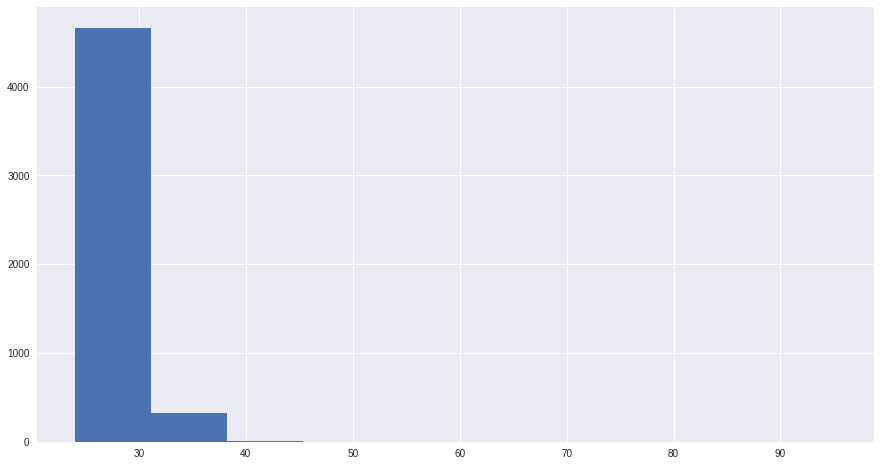

In [196]:
x["Per. ident"].hist()

In [118]:
par_identite = x[ x["Per. ident"] > 29 ].copy()
par_identite.shape

(1843, 12)

In [119]:
par_eval = par_identite[ par_identite["E value"] > 1e-39 ].copy()
par_eval.shape

(1779, 12)

In [125]:
id_nuestras_betas = par_eval.taxonomy.apply(lambda x: x if "Beta" in x else np.nan).dropna().index

In [130]:
nuestras_betas = par_eval.loc[id_nuestras_betas, :]
nuestras_betas.shape

(270, 12)

array([[<AxesSubplot:title={'center':'E value'}>,
        <AxesSubplot:title={'center':'Per. ident'}>]], dtype=object)

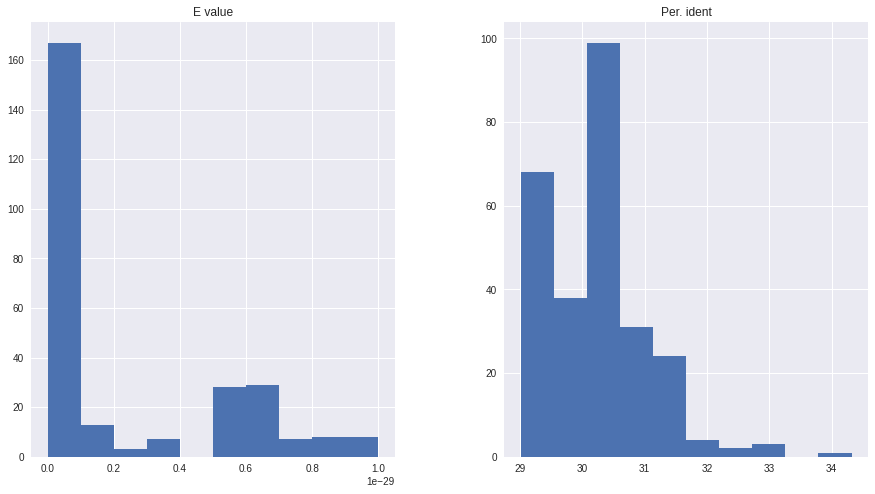

In [134]:
nuestras_betas[["E value", "Per. ident"]].hist()

In [148]:
(
    nuestras_betas.sort_values(by=["Per. ident"], ascending=False)
    .sort_values(by=["E value"], ascending=True)
    .Accession
    .to_list()[7]
)

'PTM69502.1'

In [150]:
(
    nuestras_betas.sort_values(by=["Per. ident"], ascending=False)
    .sort_values(by=["E value"], ascending=True)
    .head(10)
)

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
112,ATP-dependent DNA helicase RecG [Sulfurirhabdu...,Sulfurirhabdus autotrophica,158,158,99.0,5.000000e-39,31.73,704,WP_124945102.1,ATP-dependent DNA helicase RecG,Sulfurirhabdus autotrophica,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
120,ATP-dependent DNA helicase RecG [Gallionellale...,Gallionellales bacterium GWA2_55_18,157,157,99.0,6.000000e-39,30.51,703,OGS80185.1,ATP-dependent DNA helicase RecG,Gallionellales bacterium GWA2_55_18,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
123,ATP-dependent DNA helicase RecG [Ferrovum sp. ...,Ferrovum sp. PN-J185,157,157,98.0,7.000000e-39,30.48,683,WP_067494882.1,ATP-dependent DNA helicase RecG,Ferrovum sp. PN-J185,Bacteria:Proteobacteria:Betaproteobacteria:Fer...
184,ATP-dependent DNA helicase RecG [Nitrosomonas ...,Nitrosomonas nitrosa,155,155,98.0,3.000000e-38,30.17,688,PTR04559.1,ATP-dependent DNA helicase RecG,Nitrosomonas nitrosa,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
191,ATP-dependent DNA helicase RecG [Nitrosomonas ...,Nitrosomonas nitrosa,155,155,98.0,4.000000e-38,30.17,684,WP_107789476.1,ATP-dependent DNA helicase RecG,Nitrosomonas nitrosa,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
198,ATP-dependent DNA helicase RecG [Gallionellale...,Gallionellales bacterium RIFCSPLOWO2_02_FULL_5...,155,155,98.0,5.000000e-38,30.11,699,OGS99484.1,ATP-dependent DNA helicase RecG,Gallionellales bacterium RIFCSPLOWO2_02_FULL_5...,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
202,ATP-dependent DNA helicase RecG [Nitrosomonas ...,Nitrosomonas nitrosa,155,155,98.0,5.000000e-38,30.17,684,WP_107783623.1,ATP-dependent DNA helicase RecG,Nitrosomonas nitrosa,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
206,ATP-dependent DNA helicase RecG [Nitrosomonas ...,Nitrosomonas nitrosa,155,155,98.0,5.000000e-38,30.17,688,PTM69502.1,ATP-dependent DNA helicase RecG,Nitrosomonas nitrosa,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
220,TPA: ATP-dependent DNA helicase RecG [Nitrosom...,Nitrosomonas nitrosa,154,154,98.0,8.000000e-38,30.17,684,HBZ29020.1,TPA: ATP-dependent DNA helicase RecG,Nitrosomonas nitrosa,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
227,ATP-dependent DNA helicase RecG [Neisseria sp....,Neisseria sp. 83E34,154,154,99.0,1.000000e-37,30.81,679,WP_054617667.1,ATP-dependent DNA helicase RecG,Neisseria sp. 83E34,Bacteria:Proteobacteria:Betaproteobacteria:Nei...


In [138]:
nuestras_betas.sort_values(by=["E value"], ascending=True).sort_values(by=["Per. ident"], ascending=False).head()

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
4693,ATP-dependent DNA helicase RecG [Bacillus pseu...,Bacillus pseudomycoides,132,132,65.0,7.000000e-30,34.32,682,WP_098916237.1,ATP-dependent DNA helicase RecG,Bacillus pseudomycoides,Bacteria:Proteobacteria:Betaproteobacteria:Nei...
1515,ATP-dependent DNA helicase RecG [Candidatus Ki...,Candidatus Kinetoplastibacterium crithidii,140,140,99.0,6.000000e-33,33.24,680,WP_015238527.1,ATP-dependent DNA helicase RecG,Candidatus Kinetoplastibacterium crithidii,Bacteria:Proteobacteria:Betaproteobacteria:Nit...
3496,ATP-dependent DNA helicase RecG [Dictyoglomus ...,Dictyoglomus thermophilum,135,135,98.0,6.000000e-31,32.97,778,WP_012548735.1,ATP-dependent DNA helicase RecG,Dictyoglomus thermophilum,Bacteria:Proteobacteria:Betaproteobacteria:Nei...
3259,TPA: ATP-dependent DNA helicase RecG [Gallicol...,Gallicola sp.,134,134,79.0,4.000000e-31,32.86,602,HHX70285.1,TPA: ATP-dependent DNA helicase RecG,Gallicola sp.,Bacteria:Proteobacteria:Betaproteobacteria:Nei...
1825,ATP-dependent DNA helicase RecG [Tissierella c...,Tissierella creatinophila,139,139,99.0,2.000000e-32,32.40,681,WP_075728217.1,ATP-dependent DNA helicase RecG,Tissierella creatinophila,Bacteria:Proteobacteria:Betaproteobacteria:Nei...


In [92]:
x.loc[100, :]

Description    ATP-dependent DNA helicase RecG [Epulopiscium ...
Common Name                         Epulopiscium sp. AS2M-Bin002
Max Score                                                    158
Total Score                                                  158
Query Cover                                                   99
E value                                                    3e-39
Per. ident                                                  32.2
Acc. Len                                                     668
Accession                                             OON91339.1
function                        ATP-dependent DNA helicase RecG 
species                             Epulopiscium sp. AS2M-Bin002
taxonomy                                                     NaN
Name: 100, dtype: object

### Firmicutes 

In [152]:
firm_e_value = x[ x["E value"] > 1e-38 ].copy()
firm_e_value.shape

(4841, 12)

In [153]:
firm_id = firm_e_value[ firm_e_value["Per. ident"] > 29 ].copy()
firm_id.shape

(1761, 12)

In [156]:
id_nuestras_firmis = firm_id.taxonomy.apply(lambda x: x if "Firm" in x else np.nan).dropna().index
id_nuestras_firmis.shape

(682,)

In [158]:
nos_firmis = firm_id.loc[id_nuestras_firmis, :]
nos_firmis.shape

(682, 12)

array([[<AxesSubplot:title={'center':'E value'}>,
        <AxesSubplot:title={'center':'Per. ident'}>]], dtype=object)

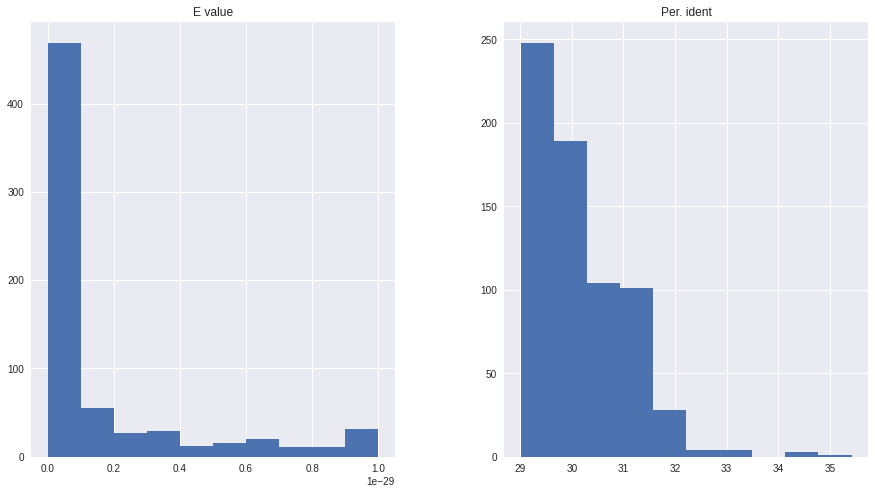

In [159]:
nos_firmis[["E value", "Per. ident"]].hist()

In [199]:
(
    nos_firmis[ nos_firmis["E value"] > 9e-38]
    .sort_values(by=["E value"], ascending=True)
    .sort_values(by=["Per. ident"], ascending=False)
    .head(20)
)

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
2956,ATP-dependent DNA helicase RecG [Turicibacter ...,Turicibacter sanguinis,135,135,67.0,3.000000e-31,35.42,575,MTL38005.1,ATP-dependent DNA helicase RecG,Turicibacter sanguinis,Bacteria:Firmicutes:Bacilli:Bacillales:Bacilla...
3353,ATP-dependent DNA helicase RecG [Clostridiales...,Clostridiales bacterium,135,135,73.0,5.000000e-31,34.22,685,NLX70386.1,ATP-dependent DNA helicase RecG,Clostridiales bacterium,Bacteria:Firmicutes:Bacilli:Lactobacillales:En...
4887,MULTISPECIES: ATP-dependent DNA helicase RecG ...,unclassified Absiella,131,131,65.0,1.000000e-29,34.20,669,WP_117452722.1,MULTISPECIES: ATP-dependent DNA helicase RecG,unclassified Absiella,Bacteria:Firmicutes:Bacilli:Bacillales
2718,TPA: ATP-dependent DNA helicase RecG [Balneola...,Balneolaceae bacterium,132,132,75.0,2.000000e-31,34.18,355,HBX66531.1,TPA: ATP-dependent DNA helicase RecG,Balneolaceae bacterium,Bacteria:Firmicutes:Bacilli:Bacillales:Bacilla...
4469,aTP-dependent DNA helicase RecG [Clostridium s...,Clostridium sp. CAG:710,132,132,98.0,4.000000e-30,33.43,663,CCZ60035.1,aTP-dependent DNA helicase RecG,Clostridium sp. CAG:710,Bacteria:Firmicutes:Clostridia:Clostridiales:C...
1005,ATP-dependent DNA helicase RecG [Lactobacillal...,Lactobacillales bacterium,144,144,98.0,4.000000e-34,33.43,661,MBE6160230.1,ATP-dependent DNA helicase RecG,Lactobacillales bacterium,Bacteria:Firmicutes:Bacilli:Lactobacillales:un...
3554,ATP-dependent DNA helicase RecG [Desulfurobact...,Desulfurobacterium thermolithotrophum,135,135,99.0,7.000000e-31,33.06,818,WP_013638860.1,ATP-dependent DNA helicase RecG,Desulfurobacterium thermolithotrophum,Bacteria:Firmicutes:Bacilli:Lactobacillales:St...
4574,ATP-dependent DNA helicase RecG [Legionella sp...,Legionella sp. W10-070,132,132,94.0,5.000000e-30,32.95,690,WP_133131761.1,ATP-dependent DNA helicase RecG,Legionella sp. W10-070,Bacteria:Firmicutes:Bacilli:Bacillales:Planoco...
649,ATP-dependent DNA helicase RecG [Clostridiacea...,Clostridiaceae bacterium,147,147,99.0,3.000000e-35,32.49,742,NLV62574.1,ATP-dependent DNA helicase RecG,Clostridiaceae bacterium,Bacteria:Firmicutes:Clostridia:Clostridiales:C...
1597,ATP-dependent DNA helicase RecG [Tenericutes b...,Tenericutes bacterium,140,140,98.0,9.000000e-33,32.49,666,NLA34046.1,ATP-dependent DNA helicase RecG,Tenericutes bacterium,Bacteria:Firmicutes:Clostridia:Clostridiales:P...


In [162]:
(
    nos_firmis
    .sort_values(by=["E value"], ascending=True)
    .sort_values(by=["Per. ident"], ascending=False)
    .head(5)
)

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
2956,ATP-dependent DNA helicase RecG [Turicibacter ...,Turicibacter sanguinis,135,135,67.0,3.000000e-31,35.42,575,MTL38005.1,ATP-dependent DNA helicase RecG,Turicibacter sanguinis,Bacteria:Firmicutes:Bacilli:Bacillales:Bacilla...
3353,ATP-dependent DNA helicase RecG [Clostridiales...,Clostridiales bacterium,135,135,73.0,5.000000e-31,34.22,685,NLX70386.1,ATP-dependent DNA helicase RecG,Clostridiales bacterium,Bacteria:Firmicutes:Bacilli:Lactobacillales:En...
4887,MULTISPECIES: ATP-dependent DNA helicase RecG ...,unclassified Absiella,131,131,65.0,1.000000e-29,34.20,669,WP_117452722.1,MULTISPECIES: ATP-dependent DNA helicase RecG,unclassified Absiella,Bacteria:Firmicutes:Bacilli:Bacillales
2718,TPA: ATP-dependent DNA helicase RecG [Balneola...,Balneolaceae bacterium,132,132,75.0,2.000000e-31,34.18,355,HBX66531.1,TPA: ATP-dependent DNA helicase RecG,Balneolaceae bacterium,Bacteria:Firmicutes:Bacilli:Bacillales:Bacilla...
4469,aTP-dependent DNA helicase RecG [Clostridium s...,Clostridium sp. CAG:710,132,132,98.0,4.000000e-30,33.43,663,CCZ60035.1,aTP-dependent DNA helicase RecG,Clostridium sp. CAG:710,Bacteria:Firmicutes:Clostridia:Clostridiales:C...


In [167]:
firm_acc = [
"WP_093335167.1",
"WP_124220101.1",
"ONI42253.1",
"NMA33736.1",
"WP_009488372.1",
"KPN82060.1",
]

In [168]:
with entrez.efetch(
    db="protein", 
    id=firm_acc, 
    rettype="fasta", retmode="text"
) as in_handle:
    firm_fasta = list(seqio.parse(in_handle, format="fasta"))

In [169]:
firm_fasta

[SeqRecord(seq=Seq('MNKKLGQPVGVLPGIGEEKEKELQQIGLSTIEDLFHHFPYRYENMEVEPVENLR...KLD'), id='WP_093335167.1', name='WP_093335167.1', description='WP_093335167.1 ATP-dependent DNA helicase RecG [Salibacterium halotolerans]', dbxrefs=[]),
 SeqRecord(seq=Seq('MIKEPVDHIPSVGEKTKEQLEMLGITKVGDLLFHFPFRYDFFEVKPLTELNHEE...IFD'), id='WP_124220101.1', name='WP_124220101.1', description='WP_124220101.1 ATP-dependent DNA helicase RecG [Aquisalibacillus elongatus]', dbxrefs=[]),
 SeqRecord(seq=Seq('MTKGGEILVKGVGEQTLQRLNKLGIYTAIDLLEHYPREYEDRRIITSIDNINID...NAL'), id='ONI42253.1', name='ONI42253.1', description='ONI42253.1 ATP-dependent DNA helicase RecG [Epulopiscium sp. SCG-B11WGA-EpuloA1]', dbxrefs=[]),
 SeqRecord(seq=Seq('MLKKPLQYLKGVGEARAALFKRLGIHTVGDVISHYPRDYEDRSMLKKLIQLEDG...SMN'), id='NMA33736.1', name='NMA33736.1', description='NMA33736.1 ATP-dependent DNA helicase RecG [Clostridiaceae bacterium]', dbxrefs=[]),
 SeqRecord(seq=Seq('MPSIYEEVGQIKGIGAKTKGALQKLGIFTIEDLLTYYPFRFTDLRENETFDFST...YGW'), id='W

### Nos alpha

In [170]:
id_alphas = x.taxonomy.apply(lambda x: x if "Alpha" in x else np.nan).dropna().index
id_alphas.shape

(13,)

In [171]:
nos_alphas = x.loc[id_alphas, :]
nos_alphas.shape

(13, 12)

In [191]:
aber = (
    nos_alphas
    .sort_values(["Per. ident"], ascending=False)
    .sort_values(["E value"], ascending=True)
)
aber.head()

,Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession,function,species,taxonomy
8,DEAD/DEAH box helicase [Pelagibacterales bacte...,Pelagibacterales bacterium,277,277,100.0,2.000000e-84,46.02,589,MBC8297997.1,DEAD/DEAH box helicase,Pelagibacterales bacterium,Bacteria:Proteobacteria:Alphaproteobacteria:Pe...
265,ATP-dependent DNA helicase RecG [Marinovum sp.],Marinovum sp.,153,153,99.0,2.000000e-37,30.64,689,MBF20837.1,ATP-dependent DNA helicase RecG,Marinovum sp.,Bacteria:Proteobacteria:Alphaproteobacteria:Rh...
325,ATP-dependent DNA helicase RecG [Alphaproteoba...,Alphaproteobacteria bacterium 13_1_20CM_3_64_12,151,151,98.0,1.000000e-36,26.40,664,OLE33425.1,ATP-dependent DNA helicase RecG,Alphaproteobacteria bacterium 13_1_20CM_3_64_12,Bacteria:Proteobacteria:Alphaproteobacteria
434,ATP-dependent DNA helicase RecG [Pelagibactera...,Pelagibacteraceae bacterium,149,149,98.0,4.000000e-36,31.82,694,PCH49212.1,ATP-dependent DNA helicase RecG,Pelagibacteraceae bacterium,Bacteria:Proteobacteria:Alphaproteobacteria:Pe...
1144,ATP-dependent DNA helicase RecG [Pseudomonas o...,Pseudomonas otitidis,143,143,98.0,9.000000e-34,26.91,691,WP_165664288.1,ATP-dependent DNA helicase RecG,Pseudomonas otitidis,Bacteria:Proteobacteria:Alphaproteobacteria:Rh...


In [190]:
aber.loc[265, "taxonomy"]

'Bacteria:Proteobacteria:Alphaproteobacteria:Rhodobacterales:Rhodobacteraceae:Marinovum'

In [179]:
matchs = [
    sequences[i].id == x.Accession[i]
    for i in range(len(sequences))
]
reduce(lambda x, y: x and y, matchs)

False

In [185]:
### Whoops : it seems that numerical iteration was indeed a bad idea ! 

In [177]:
reduce(lambda x, y: x and y, [True, False])

False

In [184]:
sequences[3000].id == x.Accession[3000]

False

In [53]:
":".join(sequences[-500].annotations["taxonomy"])

'Bacteria:Proteobacteria:Gammaproteobacteria:Orbales:Orbaceae:Gilliamella'

In [58]:
":".join([])

''

In [61]:
# some dummy test : 
with entrez.efetch(db="nucleotide", id="EU490707", rettype="gb", retmode="text") as wow:
    print(wow.read())

LOCUS       EU490707                1302 bp    DNA     linear   PLN 26-JUL-2016
DEFINITION  Selenipedium aequinoctiale maturase K (matK) gene, partial cds;
            chloroplast.
ACCESSION   EU490707
VERSION     EU490707.1
KEYWORDS    .
SOURCE      chloroplast Selenipedium aequinoctiale
  ORGANISM  Selenipedium aequinoctiale
            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;
            Spermatophyta; Magnoliopsida; Liliopsida; Asparagales; Orchidaceae;
            Cypripedioideae; Selenipedium.
REFERENCE   1  (bases 1 to 1302)
  AUTHORS   Neubig,K.M., Whitten,W.M., Carlsward,B.S., Blanco,M.A., Endara,L.,
            Williams,N.H. and Moore,M.
  TITLE     Phylogenetic utility of ycf1 in orchids: a plastid gene more
            variable than matK
  JOURNAL   Plant Syst. Evol. 277 (1-2), 75-84 (2009)
REFERENCE   2  (bases 1 to 1302)
  AUTHORS   Neubig,K.M., Whitten,W.M., Carlsward,B.S., Blanco,M.A.,
            Endara,C.L., Williams,N.H. and Moore,M.J.
  TIT

In [18]:
help(entrez.efetch)

Help on function efetch in module Bio.Entrez:

efetch(db, **keywords)
    Fetch Entrez results which are returned as a handle.
    
    EFetch retrieves records in the requested format from a list or set of one or
    more UIs or from user's environment.
    
    See the online documentation for an explanation of the parameters:
    http://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch
    
    Return a handle to the results.
    
    Raises an IOError exception if there's a network error.
    
    Short example:
    
    >>> from Bio import Entrez
    >>> Entrez.email = "Your.Name.Here@example.org"
    >>> handle = Entrez.efetch(db="nucleotide", id="AY851612", rettype="gb", retmode="text")
    >>> print(handle.readline().strip())
    LOCUS       AY851612                 892 bp    DNA     linear   PLN 10-APR-2007
    >>> handle.close()
    
    This will automatically use an HTTP POST rather than HTTP GET if there
    are over 200 identifiers as recommended by the NCBI.
    
    

In [32]:
with open(blast.locations.cinqk.lglob(description_glob)[0], "r") as f:
    x = f.readline()

In [34]:
x

'Description,Common Name,Max Score,Total Score,Query Cover,E value,Per. ident,Acc. Len,Accession  \n'